# Chaleur - Résumé des tentatives précédentes, amélioration et condensation

### Attention ! Ne pas faire "Run all" dans le notebook !

Certains programmes prennent beaucoup de temps à tourner en fonction de la commune, il vaut mieux faire cellule par cellule sans lancer les programmes non nécessaires.

In [29]:
departements={"01":"Ain","02":"Aisne","03":"Allier","04":"Alpes-de-Haute-Provence","05":"Hautes-Alpes","06":"Alpes-Maritimes","07":"Ardèche","08":"Ardennes","09":"Ariège","10":"Aube","11":"Aude","12":"Aveyron","13":"Bouches-du-Rhône","14":"Calvados","15":"Cantal","16":"Charente","17":"Charente-Maritime","18":"Cher","19":"Corrèze","2A":"Corse-du-Sud","2B":"Haute-Corse","21":"Côte-d'Or","22":"Côtes-d'Armor","23":"Creuse","24":"Dordogne","25":"Doubs","26":"Drôme","27":"Eure","28":"Eure-et-Loir","29":"Finistère","30":"Gard","31":"Haute-Garonne","32":"Gers","33":"Gironde","34":"Hérault","35":"Ille-et-Vilaine","36":"Indre","37":"Indre-et-Loire","38":"Isère","39":"Jura","40":"Landes","41":"Loir-et-Cher","42":"Loire","43":"Haute-Loire","44":"Loire-Atlantique","45":"Loiret","46":"Lot","47":"Lot-et-Garonne","48":"Lozère","49":"Maine-et-Loire","50":"Manche","51":"Marne","52":"Haute-Marne","53":"Mayenne","54":"Meurthe-et-Moselle","55":"Meuse","56":"Morbihan","57":"Moselle","58":"Nièvre","59":"Nord","60":"Oise","61":"Orne","62":"Pas-de-Calais","63":"Puy-de-Dôme","64":"Pyrénées-Atlantiques","65":"Hautes-Pyrénées","66":"Pyrénées-Orientales","67":"Bas-Rhin","68":"Haut-Rhin","69":"Rhône","70":"Haute-Saône","71":"Saône-et-Loire","72":"Sarthe","73":"Savoie","74":"Haute-Savoie","75":"Paris","76":"Seine-Maritime","77":"Seine-et-Marne","78":"Yvelines","79":"Deux-Sèvres","80":"Somme","81":"Tarn","82":"Tarn-et-Garonne","83":"Var","84":"Vaucluse","85":"Vendée","86":"Vienne","87":"Haute-Vienne","88":"Vosges","89":"Yonne","90":"Territoire de Belfort","91":"Essonne","92":"Hauts-de-Seine","93":"Seine-Saint-Denis","94":"Val-de-Marne","95":"Val-d'Oise","971":"Guadeloupe","972":"Martinique","973":"Guyane","974":"La Réunion","976":"Mayotte"}


In [30]:
# Chemins vers les fichiers GeoPackage
import pandas as pd 
#departement=input("Departement : ")
departement="60"
nom_departement=departements[departement]
print(f"Traitement du département {departement} - {nom_departement}")
buildings_file = f"/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/HEAT-NETWORKS/data_basis/depart_{departement}/conso_coords_{departement}.csv"
roads_file = f"/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/HEAT-NETWORKS/data_basis/depart_{departement}/final_routes_{departement}.csv"



# Charger avec le séparateur correct
df_buildings= pd.read_csv(buildings_file, sep=',', dtype=str, on_bad_lines='skip', encoding='utf-8')

roads_df = pd.read_csv(roads_file, sep=',', dtype=str, on_bad_lines='skip', encoding='utf-8')


df_buildings_copie=df_buildings[["COM_INSEE", "CHAUF_MWH", "ECS_MWH", "geom_group"]].copy()
df_buildings_copie.rename(columns={"CHAUF_MWH": "conso_ref_chauf_MWh", "ECS_MWH": "conso_ref_ecs_MWh", "COM_INSEE": "code_commune_insee", "geom_group" : "geom_groupe"}, inplace=True)

df_buildings_copie["conso_ref_tot_MWh"] = df_buildings_copie["conso_ref_chauf_MWh"].astype(float) + df_buildings_copie["conso_ref_ecs_MWh"].astype(float)

#filtrage des propriétés : enlever les Na partout
df_buildings_copie = df_buildings_copie.dropna(subset=["conso_ref_chauf_MWh", "geom_groupe", "code_commune_insee"])


Traitement du département 60 - Oise


In [31]:
#affichage du nombre de bâtiments par commune par ordre croissant

#print(df_buildings_copie["code_commune_insee"].value_counts().sort_values()[:30])  # Affiche les 10 communes avec le moins de bâtiments
print(df_buildings_copie["code_commune_insee"].value_counts().sort_values(ascending=False)[:100])  # Affiche les 10 communes avec le plus de bâtiments

code_commune_insee
60057    13686
60159     6847
60176     4274
60471     4003
60395     3908
         ...  
60010      795
60597      794
60477      792
60065      788
60044      787
Name: count, Length: 100, dtype: int64


In [32]:
import pandas as pd
#Indiquer le libellé d'une commune à partir de son code INSEE
communes_insee_file="/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/HEAT-NETWORKS/data_basis/insee_communes_2024.csv"
communes_insee = pd.read_csv(
    communes_insee_file,
    dtype=str,
    sep='","',
    engine='python'
)

# Nettoyage des guillemets
communes_insee.columns = communes_insee.columns.str.replace('"', '')
communes_insee = communes_insee.apply(lambda c: c.str.replace('"', '', regex=False))

# Séparer TYPECOM et COM
communes_insee[['TYPECOM', 'COM']] = communes_insee['TYPECOM,COM'].str.split(',', expand=True)

# Supprimer l’ancienne colonne cassée
communes_insee = communes_insee.drop(columns=['TYPECOM,COM'])

# Vérification
print(communes_insee.columns)

# Sélection + renommage
communes_insee_copie = communes_insee[["COM", "LIBELLE"]].copy()
communes_insee_copie = communes_insee_copie.rename(
    columns={
        "COM": "code_commune_insee",
        "LIBELLE": "libelle_commune_insee"
    }
)

print(communes_insee_copie.columns)

#enlever le 0 devant les codes insee si besoin
#communes_insee_copie["code_commune_insee"] = communes_insee_copie["code_commune_insee"].str.lstrip("0")

#ajouter la colonne libellé commune dans df_buildings_copie
df_buildings_copie = df_buildings_copie.merge(
    communes_insee_copie,
    on="code_commune_insee",
    how="left"
)

# Groupement par commune
buildings_by_commune = {
    commune: df.reset_index(drop=True)
    for commune, df in df_buildings_copie.groupby("code_commune_insee")
}

print(buildings_by_commune.keys())


Index(['REG', 'DEP', 'CTCD', 'ARR', 'TNCC', 'NCC', 'NCCENR', 'LIBELLE', 'CAN',
       'COMPARENT', 'TYPECOM', 'COM'],
      dtype='object')
Index(['code_commune_insee', 'libelle_commune_insee'], dtype='object')
dict_keys(['60001', '60002', '60003', '60004', '60005', '60006', '60007', '60008', '60009', '60010', '60011', '60012', '60013', '60014', '60015', '60016', '60017', '60019', '60020', '60021', '60022', '60023', '60024', '60025', '60026', '60027', '60028', '60029', '60030', '60031', '60032', '60033', '60034', '60035', '60036', '60037', '60039', '60040', '60041', '60042', '60043', '60044', '60045', '60046', '60047', '60048', '60049', '60050', '60051', '60052', '60053', '60054', '60055', '60056', '60057', '60058', '60059', '60060', '60061', '60062', '60063', '60064', '60065', '60066', '60067', '60068', '60069', '60070', '60071', '60072', '60073', '60074', '60075', '60076', '60077', '60078', '60079', '60081', '60082', '60083', '60084', '60085', '60086', '60087', '60088', '60089', '600

In [33]:
# Demande du code postal de la ville/lieu à étudier

def ask_code_commune():
    while True:
        code_postal = input("Veuillez entrer le code postal de la commune que vous souhaitez étudier : ")
        
        """# Validation si
        
    mple : vérifier que le code postal contient exactement 5 chiffres
        if code_postal.isdigit() and len(code_postal) == 5:
            return code_postal
        else:
            print("Le code commune Insee doit contenir exactement 5 chiffres. Veuillez réessayer.")"""
        return code_postal



def find_libelle_commune(code_commune):
    #buildings_df = pd.read_csv(buildings_file, dtype={'ban_code_commune_insee': str})
    
    matching_rows = buildings_by_commune.get(code_commune, pd.DataFrame())
    
    if not matching_rows.empty:
        libelle_commune = matching_rows.iloc[0]['libelle_commune_insee']
        return libelle_commune
    else:
        
        return None


code_commune_insee = ask_code_commune()
libelle_commune = find_libelle_commune(code_commune_insee)

print(f"Code commune Insee retenu : {code_commune_insee}")
print(f"Commune sélectionnée : {libelle_commune}")

Code commune Insee retenu : 60057
Commune sélectionnée : Beauvais


In [34]:
# Extraction des bâtiments

df_selected_buildings=buildings_by_commune.get(code_commune_insee, pd.DataFrame())

print(f"{len(df_selected_buildings)} bâtiments ont été retenus pour la commune {libelle_commune} ({code_commune_insee}).")


13686 bâtiments ont été retenus pour la commune Beauvais (60057).


In [35]:
print(df_selected_buildings.columns)

Index(['code_commune_insee', 'conso_ref_chauf_MWh', 'conso_ref_ecs_MWh',
       'geom_groupe', 'conso_ref_tot_MWh', 'libelle_commune_insee'],
      dtype='object')


In [36]:
# Extraction des routes
roads = []  # bâtiments qui seront considérés pour le RCU
n = len(roads_df)

for road in range(n):
    properties = roads_df.iloc[road].to_dict()


    if pd.notna(properties["geom_groupe"]):
        roads.append(road)

print(len(roads), "routes ont été retenues.")
df_selected_roads = roads_df.iloc[roads]


241785 routes ont été retenues.


Adapter les coordonnées (différentes pour buildings et roads)

In [37]:
from pyproj import Transformer
from shapely.ops import transform
from shapely import wkt
transformer = Transformer.from_crs(
    "EPSG:4326",
    "EPSG:2154",
    always_xy=True
)

def reproject_wkt(wkt_geom, transformer):
    try:
        geom = wkt.loads(wkt_geom)
        return transform(transformer.transform, geom)
    except Exception:
        return None
    
df_selected_buildings["geom_proj"] = df_selected_buildings["geom_groupe"].apply(
    lambda x: reproject_wkt(x, transformer)
)



In [38]:
import numpy as np
sorted_index_hab = np.argsort(df_selected_buildings["conso_ref_tot_MWh"])[::-1]

df_buildings_sorted = df_selected_buildings.iloc[sorted_index_hab]
#reset index
df_buildings_sorted = df_buildings_sorted.reset_index(drop=True)

print(f"Le nombre final de bâtiments retenus est de {len(df_buildings_sorted["conso_ref_tot_MWh"])}.")
print(f"La demande totale en chaleur est de {np.sum(df_buildings_sorted["conso_ref_tot_MWh"])/1e3:.2f} GWh/an.")
print(f"Le plus gros bâtiment a une demande de {df_buildings_sorted['conso_ref_tot_MWh'].iloc[0]:.2f} MWh/an.")

print(df_buildings_sorted["conso_ref_tot_MWh"].describe())

print(len(df_buildings_sorted[df_buildings_sorted["conso_ref_tot_MWh"] > 58]))
print(f"Le ratio de bâtiments avec une demande supérieure à 58 MWh/an est de {len(df_buildings_sorted[df_buildings_sorted['conso_ref_tot_MWh'] > 58]) / len(df_buildings_sorted) * 100:.2f} %.")

Le nombre final de bâtiments retenus est de 13686.
La demande totale en chaleur est de 409.70 GWh/an.
Le plus gros bâtiment a une demande de 4229.00 MWh/an.
count    13686.00000
mean        29.93592
std         98.96615
min          0.00000
25%          8.00000
50%         12.00000
75%         18.00000
max       4229.00000
Name: conso_ref_tot_MWh, dtype: float64
1052
Le ratio de bâtiments avec une demande supérieure à 58 MWh/an est de 7.69 %.


## Tri des bâtiments pour ne retenir que les bâtiments susceptibles d'être rentable selon un premier critère

#### Critère des 30KW transformés en énergie 

##### Estimation de la consommation énergétique annuelle moyenne

Nous utilisons des profils typiques de demande en chaleur. Nous disposons de trois fichiers correspondant aux courbes typiques des bâtiments construits durant les périodes suivantes :
* Avant 1989 (exclu) : `RT_1974_Treated.csv` (il s'agit en réalité des normes des bâtiments construits entre 1974 et 1989);
* Entre 1989 (inclus) et 2005 (exclu) : `RT_1989_Trated.csv` (il s'agit des normes des bâtiments construits entre 1989 et 2005);
* Après 2005 (inclus) : `RT_2005_Treated.csv`.

Il s'agit de timeseries que nous allons manipuler avec `pandas`.

In [39]:
import pandas as pd 

heat_profile_1974 = pd.read_csv("/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/temperatures/RT_2005_Treated.csv")
heat_profile_1989 = pd.read_csv("/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/temperatures/RT_1989_Treated.csv")
heat_profile_2005 = pd.read_csv("/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/temperatures/RT_2005_Treated.csv")

In [40]:
print(heat_profile_1974.columns)

Index(['ElapsedTime', 'Text', 'Tindoor', 'Tdepart', 'Tretour', 'Debit_eau',
       'Conso_energetique_integrale'],
      dtype='object')


On calcule ensuite la puissance thermique demandée pour chaque bâtiment toutes les heures à partir de la formule suivante:

À un instant t donné : 
$$
\Phi_{th} = D_m \cdot c_p \cdot (T_{départ} - T_{retour})
$$



In [41]:
import pandas as pd
import numpy as np

# Constantes physiques
cp_water = 4180        # J/kg/K
rho_water = 1000       # kg/m3
dt = 3600              # s (pas de temps horaire)


# Calcul des puissances thermiques


df_puissance_globale = pd.DataFrame({
    "ElapsedTime": heat_profile_1974["ElapsedTime"]
})

for year, profile in zip(
    ["1974", "1989", "2005"],
    [heat_profile_1974, heat_profile_1989, heat_profile_2005]
):
    # Débit massique (kg/s) car probablement en m3/h
    mdot = profile["Debit_eau"] * rho_water / 3600

    # Puissance thermique instantanée (W)
    df_puissance_globale[f"Puissance_{year}"] = (
        mdot * cp_water * (profile["Tdepart"] - profile["Tretour"])
    )


# Puissance maximale


puissance_max = {}
for year in ["1974", "1989", "2005"]:
    puissance_max[year] = df_puissance_globale[f"Puissance_{year}"].max() / 1e3  # kW
    print(f"Puissance maximale {year} : {puissance_max[year]:.4f} kW")

print()


# Coefficients correcteurs (Pmax = 30 kW)

correction = {}
for year in ["1974", "1989", "2005"]:
    correction[year] = 30 / puissance_max[year]
    print(f"Coefficient correcteur {year} : {correction[year]:.4f}")

print()


# Énergie annuelle – méthode référence


energie_ref = {}
for year, profile in zip(
    ["1974", "1989", "2005"],
    [heat_profile_1974, heat_profile_1989, heat_profile_2005]
):
    # Dernière valeur de l'énergie intégrée (kWh)
    energie_ref[year] = profile["Conso_energetique_integrale"].iloc[-1]
    print(f"Energie totale {year} (réf) : {energie_ref[year]/1e3:.4f} MWh")

print()


# Énergie annuelle – intégration numérique 


energie_num = {}
for year in ["1974", "1989", "2005"]:
    # Intégration temporelle correcte
    energie_num[year] = np.sum(
        df_puissance_globale[f"Puissance_{year}"] * dt
    ) / 3.6e6  # kWh

    print(f"Energie totale {year} (num) : {energie_num[year]/1e3:.4f} MWh")

print()

# Énergies corrigées (puissance max = 30 kW)


energie_corrigee = {}
energie_num_corrigee = {}

for year in ["1974", "1989", "2005"]:
    energie_corrigee[year] = energie_ref[year] * correction[year]
    energie_num_corrigee[year] = energie_num[year] * correction[year]

    print(f"Energie totale corrigée {year} (réf) : {energie_corrigee[year]/1e3:.4f} MWh")
    print(f"Energie totale corrigée {year} (num) : {energie_num_corrigee[year]/1e3:.4f} MWh")
    print()


# Valeur de dimensionnement retenue

E_MAX_DEF = max(energie_num_corrigee.values()) / 1e3  # MWh/an
print(f"E_MAX_DEF retenue : {E_MAX_DEF:.2f} MWh/an")


Puissance maximale 1974 : 1.7203 kW
Puissance maximale 1989 : 1.7301 kW
Puissance maximale 2005 : 1.7203 kW

Coefficient correcteur 1974 : 17.4388
Coefficient correcteur 1989 : 17.3405
Coefficient correcteur 2005 : 17.4388

Energie totale 1974 (réf) : 3.3493 MWh
Energie totale 1989 (réf) : 3.6096 MWh
Energie totale 2005 (réf) : 3.3493 MWh

Energie totale 1974 (num) : 3.0403 MWh
Energie totale 1989 (num) : 3.3650 MWh
Energie totale 2005 (num) : 3.0403 MWh

Energie totale corrigée 1974 (réf) : 58.4074 MWh
Energie totale corrigée 1974 (num) : 53.0194 MWh

Energie totale corrigée 1989 (réf) : 62.5930 MWh
Energie totale corrigée 1989 (num) : 58.3507 MWh

Energie totale corrigée 2005 (réf) : 58.4074 MWh
Energie totale corrigée 2005 (num) : 53.0194 MWh

E_MAX_DEF retenue : 58.35 MWh/an


## Raisonnement physique

Les données correspondent à un système thermique à eau (chauffage ou échangeur).

Températures mesurées :
- Tdepart ≈ 317 K (environ 44 °C)
- Tretour ≈ 312 K (environ 39 °C)

La différence de température est donc :

$$
\Delta T = T_{depart} - T_{retour} \approx 5 \; K
$$

Le débit d’eau est donné par Debit_eau = 0.200, très probablement en m3/h.

ElapsedTime est exprimé en secondes, avec un pas de 3600 s (1 heure).

---

## Vérification par calcul d’ordre de grandeur

La puissance thermique transférée par un circuit d’eau est donnée par :

$$
P = \rho \, c_p \, \dot V \, \Delta T
$$

avec :

- $\rho$ = 1000 kg/m3 (masse volumique de l’eau)
- $c_p$ = 4180 J/(kg·K) (chaleur spécifique)
- $\dot V$ = $0.2 m^3/h$ = $5.56 × 10^{-5} m^3/s$
- $\Delta T$ ≈ 5 K

Calcul de la puissance :

$$
P \approx 1000 \times 4180 \times 5.56 \times 10^{-5} \times 5
\approx 1.16 \; kW
$$

---

## Estimation de l’énergie consommée

Sur une durée d’environ 7 heures :

$$
E = P \times t \approx 1.16 \times 7 \approx 8.1 \; kWh
$$

La valeur finale mesurée (Conso_energetique_integrale ≈ 8.97)
est cohérente avec cette estimation.

Conclusion : l’énergie est très probablement exprimée en kWh.


On prend maintenant la puissance globale pour chacun des profils, $P_{max_année_i}$ et on calcule $\alpha=\dfrac{30000}{P_{max_année_i}}$ pour avoir le coefficient permettant de contracter/dilater les courbes afin d'avoir une puissance maximale de 30kW pour les 3 profils. 

On prend ensuite la valeur de l'énergie intégrale. 

Les bâtiments ayant une énergie inférieure sont supprimés.

In [42]:
E_MAX_DEF = 58.35  # MWh/an
df_buildings_sorted_final=df_buildings_sorted[df_buildings_sorted["conso_ref_tot_MWh"]>=E_MAX_DEF]
#df_buildings_sorted_final=df_buildings_sorted[df_buildings_sorted["conso_ref_tot_MWh"]>=0]


print(f"Le nombre final de bâtiments retenus après application de E_MAX_DEF est de {len(df_buildings_sorted_final['conso_ref_tot_MWh'])}."    )

print(df_buildings_sorted_final["conso_ref_tot_MWh"].describe())

Le nombre final de bâtiments retenus après application de E_MAX_DEF est de 1052.
count    1052.000000
mean      232.044677
std       286.707380
min        59.000000
25%        85.000000
50%       145.500000
75%       266.250000
max      4229.000000
Name: conso_ref_tot_MWh, dtype: float64


In [43]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
from shapely.geometry import LineString, MultiLineString, Polygon, MultiPolygon


def get_centroid_geom(geom):
    if geom is None:
        return None
    if isinstance(geom, MultiPolygon):
        geom = max(geom.geoms, key=lambda p: p.area)
    if isinstance(geom, Polygon):
        c = geom.centroid
        return c.x, c.y
    return None

# Fonction pour transformer LineString / MultiLineString en segments XY
def extract_lines_xy(wkt_geom):
    try:
        geom = wkt.loads(wkt_geom)
    except Exception:
        return []  # géométrie invalide

    segments = []

    if isinstance(geom, LineString):
        coords_2d = [(c[0], c[1]) for c in geom.coords]
        segments.append(coords_2d)
    

    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            coords_2d = [(c[0], c[1]) for c in line.coords]
            segments.append(coords_2d)

    return segments

# Filtrer les segments de routes à l'intérieur du bounding box
def filter_segments(segment, min_x, max_x, min_y, max_y):
    x, y = zip(*segment)  # segment est une liste de tuples (x, y)
    x = np.array(x)
    y = np.array(y)
    return ((x >= min_x) & (x <= max_x) & (y >= min_y) & (y <= max_y)).any()










In [44]:
from shapely import Point 
# Extraction des segments pour toutes les routes
all_segments = []
for geom_wkt in df_selected_roads["geom_groupe"]:
    all_segments.extend(extract_lines_xy(geom_wkt))

# Extraire les centroids des bâtiments
centroids = df_buildings_sorted_final["geom_proj"].apply(get_centroid_geom).dropna()
df_buildings_sorted_final["centroids"]= centroids
centroids = list(centroids)


if centroids:
    centroids_x, centroids_y = zip(*centroids)
else:
    centroids_x, centroids_y = [], []

#On calcule les coordonnées du centre de la commune
cx = np.mean([c for c in centroids_x])
cy = np.mean([c for c in centroids_y])
centre_commune = Point(cx, cy)

# Calcul des distances au centre de la commune
df_buildings_sorted_final["distance_centre"] = (
    df_buildings_sorted_final["centroids"]
    .dropna()
    .apply(lambda c: Point(c).distance(centre_commune))
    .astype(float)
)

df_density = df_buildings_sorted_final.dropna(
    subset=["centroids", "conso_ref_tot_MWh"]
)

weights = df_density["conso_ref_tot_MWh"].values
coords = np.array(df_density["centroids"].tolist())

# Barycentre pondéré
cx_density = np.average(coords[:, 0], weights=weights)
cy_density = np.average(coords[:, 1], weights=weights)

centre_densite = Point(cx_density, cy_density)

df_buildings_sorted_final["distance_centre_density"] = (
    df_buildings_sorted_final["centroids"]
    .dropna()
    .apply(lambda c: Point(c).distance(centre_densite))
    .astype(float)
)

#Sélection des 10 bâtiments les plus proches du centre
df_10_centre_geom = (
    df_buildings_sorted_final
    .dropna(subset=["distance_centre"])
    .sort_values("distance_centre")
    .head(10)
)

df_10_centre_density = (
    df_buildings_sorted_final
    .dropna(subset=["distance_centre_density"])
    .sort_values("distance_centre_density")
    .head(10)
)

#index de ces 10 bâtiments trié par ordre décroissant de consommation
sorted_10_index_centre_geom = (
    df_10_centre_geom
    .sort_values("conso_ref_tot_MWh", ascending=False)
    .index
    .tolist()
)

sorted_10_index_centre_density = (
    df_10_centre_density
    .sort_values("conso_ref_tot_MWh", ascending=False)
    .index
    .tolist()
)

print(sorted_10_index_centre_geom)
print(sorted_10_index_centre_density)

#Récupérer l'index du plus grand consommateur parmi les 10 bâtiments les plus proches du centre
index_highest_central_consumer = sorted_10_index_centre_geom[0]
index_highest_central_consumer_density = sorted_10_index_centre_density[0]


print(f"Index du plus grand consommateur parmi les 10 bâtiments les plus proches du centre : {index_highest_central_consumer}")
print(f"Index du plus grand consommateur parmi les 10 bâtiments les plus proches du centre de densité : {index_highest_central_consumer_density}")
# Définir la zone des bâtiments (bounding box) car toutes les routes ne sont pas nécessaires
if centroids_x:
    buffer = 50
    min_x, max_x = min(centroids_x) - buffer, max(centroids_x) + buffer
    min_y, max_y = min(centroids_y) - buffer, max(centroids_y) + buffer
    filtered_lines = [seg for seg in all_segments if filter_segments(seg, min_x, max_x, min_y, max_y)]
else:
    filtered_lines = all_segments




/var/folders/7q/1g8c6vbj47ndz60jzpr7xn7h0000gn/T/ipykernel_6747/3132377137.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buildings_sorted_final["centroids"]= centroids
/var/folders/7q/1g8c6vbj47ndz60jzpr7xn7h0000gn/T/ipykernel_6747/3132377137.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buildings_sorted_final["distance_centre"] = (
/var/folders/7q/1g8c6vbj47ndz60jzpr7xn7h0000gn/T/ipykernel_6747/3132377137.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

[29, 118, 371, 425, 456, 522, 567, 606, 981, 1005]
[29, 118, 425, 456, 522, 606, 726, 836, 981, 1005]
Index du plus grand consommateur parmi les 10 bâtiments les plus proches du centre : 29
Index du plus grand consommateur parmi les 10 bâtiments les plus proches du centre de densité : 29


Nous pouvons maintenant visualiser le quartier d'intérêt avec les bâtiments filtrés.

In [45]:

plt.figure(figsize=(12, 12))
ax = plt.gca()

# Routes filtrées (ne changent pas)
lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
ax.add_collection(lc)
ax.autoscale_view()

# Centroids
if centroids_x : 
    plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Centroids')
    plt.scatter(centroids_x[0], centroids_y[0], color='red', s=70, label='Plus grand consommateur'  )

#Afficher le centre de la commune et les 10 bâtiments autour
plt.scatter(cx, cy, color='green', s=50, label='Centre de la commune')

for i, row in df_10_centre_geom.iterrows():
    centroid = row['centroids']
    plt.scatter(centroid[0], centroid[1], color='orange', s=30, label='Bâtiments les plus proches du centre' if i == df_10_centre_geom.index[0] else "")

for i, row in df_10_centre_density.iterrows():
    centroid = row['centroids']
    plt.scatter(centroid[0], centroid[1], color='purple', s=20, label='Bâtiments les plus proches du centre de densité' if i == df_10_centre_density.index[0] else "")
    


plt.title(f"Routes et centroids des bâtiments pour zone choisie (zone restreinte) -Commune {libelle_commune} ({code_commune_insee})")

plt.legend()
plt.show()


In [46]:

def normalize_coordinates(coords):
    """
    Normalise les coordonnées en liste de tuples [(x, y)]
    """
    if coords is None:
        return []
    # Cas : (x, y)
    if isinstance(coords, (tuple, list)) and len(coords) == 2:
        if all(isinstance(c, (int, float)) for c in coords):
            return [tuple(coords)]

    # Cas : [(x, y), ...]
    if isinstance(coords, list):
        return [(c[0], c[1]) for c in coords if len(c) >= 2]
    

    raise ValueError(f"Format de coordonnées invalide : {coords}")

class Node:
    def __init__(self, index: int = None, coordinates : list[tuple] = None, road_idx1 : int=None ):
        self._index = index
        self._coordinates = normalize_coordinates(coordinates) #equivalent de self.point
        if self._coordinates != [] : 
            x, y = zip(*self._coordinates)
            self._center = (np.mean(x), np.mean(y))

        self.road_idx1=road_idx1
        self.pipe=0.0
    

    @property
    def index(self):
        return self._index
    
    @index.setter
    def index(self, value):
        self._index = value

    @property
    def road_idx1(self):
        return self._road_idx1
    
    @road_idx1.setter
    def road_idx1(self, value):
        self._road_idx1 = value
    

    @property
    def center(self):
        return self._center
    
    @center.setter
    def center(self, new_center):
        self._center = new_center

    @property
    def coordinates(self):
        return self._coordinates
    
    
    @coordinates.setter
    def coordinates(self, new_coords):
        self._coordinates = normalize_coordinates(new_coords)
        x, y = zip(*self._coordinates)
        self.center = (np.mean(x), np.mean(y))
    
    @property
    def pipe(self) :
        return self._pipe
    
    @pipe.setter
    def pipe(self, new_pipe) :
        self._pipe=float(new_pipe)
    
    def calcul_distance(self, other) :
        if not isinstance(other, Node):
            raise ValueError("L'autre objet doit être une instance de la classe Node.")
        return np.linalg.norm(np.array(self.center)-np.array(other.center))
    


class NodeBuilding(Node):
    def __init__(self, building_coordinates, heat_demand, buildings_idx, index : int = None,  coordinates : list[tuple] = None, road_idx1 : int=None) :
   
        self.building_coordinates = normalize_coordinates(building_coordinates)
        self.building_center = (np.mean([c[0] for c in self.building_coordinates]), np.mean([c[1] for c in self.building_coordinates]))
        self.buildings_idx=buildings_idx
        
        super().__init__(
            index=index,
            coordinates=coordinates, #coordonnées projetées
            road_idx1=road_idx1,
        )

        self.heat_demand = heat_demand  # MWh/an
        



    @property
    def pipe(self) :
        return self._pipe
    
    
    @pipe.setter
    def pipe(self, new_pipe) :
        self._pipe=float(new_pipe)
    
    
    #Redéfinition de la fonction égalité pour comparer deux NodesBuilding
    def __eq__(self, other):
        if not isinstance(other, NodeBuilding):
            return False
        return self.buildings_idx==other.buildings_idx and self.building_coordinates==other.building_coordinates

    
    # Permet l'utilisation comme clé de dictionnaire
    def __hash__(self):
        return hash((tuple(self.building_center), tuple(self.center), self.buildings_idx, tuple(self.coordinates),self.index ))
    def __repr__(self):
        return f"Building Node (index = {self.index}, index_building={self.buildings_idx}, center_building={self.building_center},center={self.center})"
    


class NodeRoad(Node):
    def __init__(self, index, coordinates, road_idx1, road_idx2) :
        super().__init__(
            index=index,
            coordinates=coordinates,
            road_idx1=road_idx1
        )

        self.road_idx2=road_idx2
    
        #Redéfinition de la fonction égalité pour comparer deux NodesRoad
    def __eq__(self, other):
        if not isinstance(other, NodeRoad):
            return False
        return self.road_idx1==other.road_idx1 and self.road_idx2==other.road_idx2 and self.coordinates==other.coordinates
    
    # Permet l'utilisation comme clé de dictionnaire
    def __hash__(self):
        return hash((self.road_idx1, self.road_idx2, self.index, tuple(self.coordinates), self.center))
    def __repr__(self):
        return f"Road_node (index={self.index}, center={self.center}, road_idx1={self.road_idx1}, road_idx2={self.road_idx2})"


class Road():
    def __init__(self, index : int, segments : list[list[tuple]]):
        self.coordinates = normalize_coordinates(segments[index])
        self.index = index
    

        if not self.coordinates:
            raise ValueError(f"Aucune coordonnée valide pour la route {index}")

        self.coords_array = np.array(self.coordinates, dtype=np.float32)
        self.linestring = LineString(self.coordinates)
        self.length = self.linestring.length




In [47]:
def create_liste_nodes_buildings(df_buildings):
    liste_nodes_buildings = []
    for prov_index in range(len(df_buildings)):
        row = df_buildings.iloc[prov_index]
        building_coordinates = row["centroids"]
        heat_demand = row["conso_ref_tot_MWh"]
        building_idx=len(liste_nodes_buildings)
        liste_nodes_buildings.append(
            NodeBuilding(building_coordinates, heat_demand, building_idx)
        )
    return liste_nodes_buildings

def create_roads(filtered_lines):
    liste_roads = []
    for i in range(len(filtered_lines)):
        liste_roads.append(Road(index=i, segments=filtered_lines))
    return liste_roads



In [48]:
liste_nodes_buildings = create_liste_nodes_buildings(df_buildings_sorted_final)
print(f"Nombre de bâtiments : {len(liste_nodes_buildings)}")

liste_roads = create_roads(filtered_lines)
print(f"Nombre de routes : {len(liste_roads)}")

Nombre de bâtiments : 1052
Nombre de routes : 6530


In [49]:
import numpy as np 
from collections import defaultdict
from shapely.geometry import Point
from shapely import STRtree

PRECISION = 1

def normalize_point(pt):
    return (
        round(pt[0], PRECISION),
        round(pt[1], PRECISION)
    )


lines = [r.linestring for r in liste_roads]
tree = STRtree(lines)

liste_intersection_points=[]
road_intersections = {r.index: [] for r in liste_roads} #dictionnaire de la liste des intersections entre les routes

for road in liste_roads:
    line = road.linestring
    idx = road.index

    candidate_indices = tree.query(line) #ce sont les mêmes indices que dans lines
    for other_idx in candidate_indices:
        if other_idx <= idx:
            continue  # évite doublons

        other_line = lines[other_idx]

        if not line.intersects(other_line):
            continue

        inter = line.intersection(other_line) 

        if inter.is_empty:
            continue

        if inter.geom_type == "Point":
            #pt=normalize_point((inter.x, inter.y))
            pt = (inter.x, inter.y)
            road_point = NodeRoad(
                index=len(liste_intersection_points),
                coordinates=[pt],
                road_idx1=idx,
                road_idx2=other_idx
            )
            liste_intersection_points.append(road_point)
            road_intersections[idx].append(road_point.index)
            road_intersections[other_idx].append(road_point.index)


nb_roads_intersections=len(liste_intersection_points)
#complexité globale en nlog(n)

print(f"Le nombre de routes dans road_intersections: {len(road_intersections)}")
print(f"Le nombre de points d'intersection avec les routes: {len(liste_intersection_points)}")
# Projection des bâtiments sur les routes
for building in liste_nodes_buildings:

    building_point = Point(building.building_center)

    nearest_idx = tree.nearest(building_point)
    nearest_line = lines[nearest_idx]

    # Projection orthogonale
    projected_point = nearest_line.interpolate(
        nearest_line.project(building_point)
    )
    pt = normalize_point((projected_point.x, projected_point.y))
    #pt = (projected_point.x, projected_point.y)
    #modifier très légèrement la coordonnée pour éviter les doublons
    if len(liste_intersection_points)>0 :
        if pt in [b.center for b in liste_intersection_points[:nb_roads_intersections]]:
            pt = (pt[0] + 10**-1, pt[1] + 10**-1)

    building.coordinates=[pt] #coordonnées projetées
    pipe=building_point.distance(projected_point)
    building.pipe=pipe

    building.road_idx1=nearest_idx
    building.index=len(liste_intersection_points)


    liste_intersection_points.append(building)
    road_intersections[nearest_idx].append(building.index)




    
print("Intersections calculées entre routes et bâtiments.")
print(f"Le nombre total de noeuds (bâtiments + intersections routes) est de {len(liste_intersection_points)}.")



Le nombre de routes dans road_intersections: 6530
Le nombre de points d'intersection avec les routes: 12733
Intersections calculées entre routes et bâtiments.
Le nombre total de noeuds (bâtiments + intersections routes) est de 13785.


In [50]:
#Tracer les routes, les bâtiments et les intersections
plt.figure(figsize=(12, 12))
ax = plt.gca()  
# Routesfiltrées
lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
ax.add_collection(lc)
ax.autoscale_view() 
# Bâtiments
if centroids_x :
    plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Centroids')
    plt.scatter(centroids_x[0], centroids_y[0], color='red', s=70, label='Plus grand consommateur'  )   


#Projection des bâtiments sur les routes
for building in liste_nodes_buildings:  
    plt.scatter(building.center[0], building.center[1], color='green', s=5, label='Projection des bâtiments sur les routes' if building.index == liste_nodes_buildings[0].index else "")       

#Ligne reliant les bâtiments à leur projection
for building in liste_nodes_buildings:
    building_point = Point(building.building_center)
    projected_point = Point(building.center)
    plt.plot(
        [building_point.x, projected_point.x],
        [building_point.y, projected_point.y],
        color='orange',
        linewidth=1,
        label='Ligne de projection' if building.index == liste_nodes_buildings[0].index else ""
    )

plt.title(f"Routes, bâtiments et intersections - Commune {libelle_commune} ({code_commune_insee})")
plt.legend()
plt.show()

## Important

On remarquera que les index croissants des NodeBuildings (qui sont dans la deuxième partie de liste_intersection_points) sont également les index décroissants de la demande en chaleur thermique ! 

In [51]:
from shapely.geometry import Point
for road_idx, intersections in road_intersections.items():
    line = liste_roads[road_idx].linestring
    intersections.sort(
        key=lambda ip: line.project(Point(liste_intersection_points[ip].center))
    )
    road_intersections[road_idx] = intersections  



index_maps = {
    road_idx: {ip_idx: i for i, ip_idx in enumerate(intersections)}
    for road_idx, intersections in road_intersections.items()
}

#Donne un dictionnaire avec pour clé l'index d'une route et pour valeur un dictionnaire
#avec pour clé l'index d'un point d'intersection et pour valeur l'indice de ce point 
#dans la liste triée des intersections de cette route


def add_voisin(ip_idx, voisin_idx):
    if voisin_idx != ip_idx:
        voisins[ip_idx].add(voisin_idx)
        voisins[voisin_idx].add(ip_idx)



#Calcul des voisins 
voisins={ip.index : set() for ip in liste_intersection_points} # dictionnaire des voisins pour chaque point d'intersection, on évite les doublons avec le set

for i, intersection_point in enumerate(liste_intersection_points):
    road_idx1= intersection_point.road_idx1

    if isinstance(intersection_point, NodeRoad) :
        road_idx2=intersection_point.road_idx2
    else :
        road_idx2 = None


    voisins_pot1 = road_intersections[road_idx1] #liste des index des ip triés dans l'ordre
    voisins_pot2 = road_intersections[road_idx2] if road_idx2 is not None else []

    indice1 = index_maps[road_idx1][intersection_point.index] #place du voisin potentiel dans la liste triée de road_idx1
    indice2 = index_maps[road_idx2][intersection_point.index] if road_idx2 is not None else None

 

    if indice1>0 :
        add_voisin(intersection_point.index, voisins_pot1[indice1-1])
        if indice1<len(voisins_pot1)-1 :
            add_voisin(intersection_point.index, voisins_pot1[indice1+1])
    if indice2 is not None :
        if indice2>0 :
            add_voisin(intersection_point.index, voisins_pot2[indice2-1])
        if indice2<len(voisins_pot2)-1 :
            add_voisin(intersection_point.index, voisins_pot2[indice2+1])

voisins = {ip: list(vs) for ip, vs in voisins.items()} #conversion des sets en listes d'index d'intersection points, 
                                        #résultat = dictionnaire avec pour clé IntersectionPoint et pour valeur la liste des index de ses voisins IntersectionPoint

#Cacul de la complexité de cette méthode
total_intersections = len(liste_intersection_points)
complexity_per_intersection = np.log2(total_intersections)  # pour la recherche dans la liste triée
total_complexity = total_intersections * complexity_per_intersection
print(f"Complexité totale pour le calcul des voisins : O(n log n) avec n = {total_intersections} intersections.")
print(voisins)





Complexité totale pour le calcul des voisins : O(n log n) avec n = 13785 intersections.
{0: [1, 2, 151], 1: [0, 151], 2: [0, 11], 3: [11, 4, 7], 4: [11, 3], 5: [8, 6], 6: [8, 5, 7], 7: [9, 3, 6], 8: [9, 13, 5, 6], 9: [8, 13, 7], 10: [10962, 11, 12], 11: [10, 2, 3, 4], 12: [10962, 10, 10964], 13: [8, 9, 56], 14: [17, 51], 15: [16, 17, 20], 16: [27, 20, 15], 17: [51, 14, 15], 18: [209, 19, 20], 19: [209, 18], 20: [16, 18, 15], 21: [34, 28, 22], 22: [28, 21], 23: [24, 25, 186, 34], 24: [34, 23], 25: [10988, 23], 26: [154, 27, 31], 27: [16, 26, 31], 28: [29, 21, 22], 29: [28, 30, 44], 30: [44, 29], 31: [32, 26, 27], 32: [33, 247, 53, 31], 33: [32, 52, 53], 34: [24, 21, 23], 35: [36, 37], 36: [35, 37], 37: [42, 35, 36, 38], 38: [65, 37], 39: [40, 50, 55], 40: [41, 50, 51, 39], 41: [40, 42, 47], 42: [41, 43, 37, 47], 43: [48, 42], 44: [205, 29, 30], 45: [48, 52, 46], 46: [51, 52, 45], 47: [48, 41, 42, 49], 48: [49, 43, 45, 47], 49: [48, 11200, 47], 50: [40, 39], 51: [40, 17, 14, 46], 52: [33

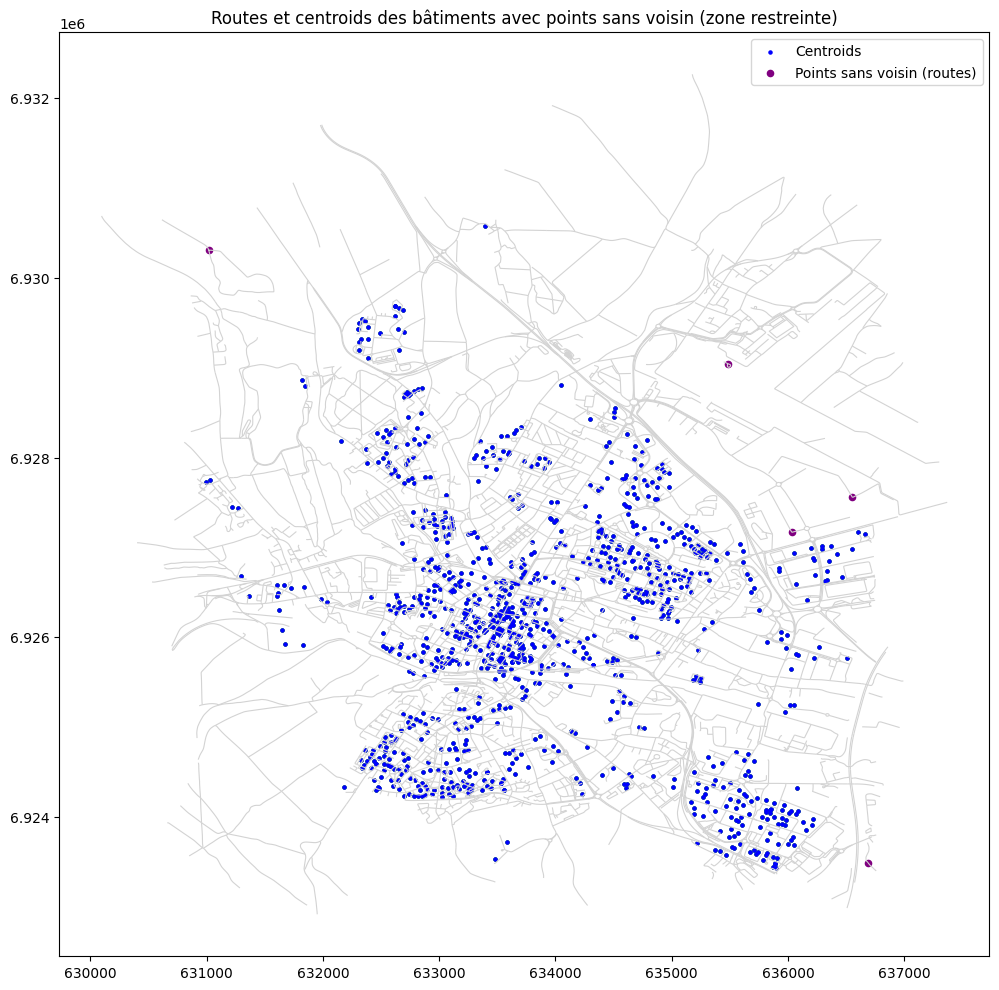

In [52]:
import matplotlib.pyplot as plt
#Dessiner la carte avec les points sans voisin en rouge
plt.figure(figsize=(12, 12))
ax = plt.gca()
# Routes filtrées (ne changent pas)
lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
ax.add_collection(lc)
#Anciens batiments (sans projeté)
for nb in liste_nodes_buildings:
    plt.scatter(nb.building_center[0], nb.building_center[1], color='green', s=5)


#plt.scatter(liste_nodes_buildings[45].building_center[0], liste_nodes_buildings[45].building_center[0], color="red", s=8)
# Centroids
plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Centroids')
# Points sans voisin

no_neighbor_points_buildings = [ip.center for ip in liste_intersection_points if len(voisins[ip.index]) == 0 and isinstance(ip, NodeBuilding)]
no_neighbor_points_roads = [ip.center for ip in liste_intersection_points if len(voisins[ip.index]) == 0 and isinstance(ip, NodeRoad)]
if no_neighbor_points_buildings:
    x_no_neighbor, y_no_neighbor = zip(*no_neighbor_points_buildings)
    plt.scatter(x_no_neighbor, y_no_neighbor, color='red', s=20, label='Points sans voisin (buildings)')
if no_neighbor_points_roads:
    x_no_neighbor_roads, y_no_neighbor_roads = zip(*no_neighbor_points_roads)
    plt.scatter(x_no_neighbor_roads, y_no_neighbor_roads, color='purple', s=20, label='Points sans voisin (routes)')
plt.title("Routes et centroids des bâtiments avec points sans voisin (zone restreinte)")
plt.legend()
plt.show()

In [53]:
#Zoom autour du batiment sans voisin avec tous les points d'intersection
if no_neighbor_points_buildings:    
    plt.figure(figsize=(12, 12))
    ax = plt.gca()
    # Routes filtrées (ne changent pas)
    lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
    ax.add_collection(lc)
    #Anciens batiments (sans projeté)
    for nb in liste_nodes_buildings:
        plt.scatter(nb.building_center[0], nb.building_center[1], color='green', s=
        5)

    for pt in liste_intersection_points:
        plt.scatter(pt.center[0], pt.center[1], color='orange', s=2)

    # Centroids
    plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Centroids')
    # Points sans voisin
    x_no_neighbor, y_no_neighbor = zip(*no_neighbor_points_buildings)
    plt.scatter(x_no_neighbor, y_no_neighbor, color='red', s=50, label='Points sans voisin (buildings)')

    # Zoom autour du premier bâtiment sans voisin
    zoom_building = no_neighbor_points_buildings[0]
    buffer = 100  # ajuster la taille du buffer selon les besoins
    plt.xlim(zoom_building[0] - buffer, zoom_building[0] + buffer)
    plt.ylim(zoom_building[1] - buffer, zoom_building[1] + buffer)

    plt.title("Zoom autour d'un bâtiment sans voisin avec tous les points d'intersection")
    plt.legend()
    plt.show()

In [54]:
#Distances moyennes batiment - route
total_distance = 0
count = 0   
for road_idx, intersections in road_intersections.items():
    for inter in intersections:
        building_node = liste_intersection_points[inter]
        if isinstance(building_node, NodeBuilding) and building_node.pipe is not None:
            total_distance += building_node.pipe
            count += 1

if count > 0:
    average_distance = total_distance / count
    std_distance = np.std([liste_intersection_points[inter].pipe for road_idx, intersections in road_intersections.items() for inter in intersections if isinstance(liste_intersection_points[inter], NodeBuilding) and liste_intersection_points[inter].pipe is not None])
    print(f"Distance moyenne bâtiment-route : {average_distance:.2f} m")
    print(f"Écart-type des distances bâtiment-route : {std_distance:.2f} m")
    print(f"Distance maximale bâtiment-route : {max([liste_intersection_points[inter].pipe for road_idx, intersections in road_intersections.items() for inter in intersections if isinstance(liste_intersection_points[inter], NodeBuilding) and liste_intersection_points[inter].pipe is not None]):.2f} m")
    print(f"Distance minimale bâtiment-route : {min([liste_intersection_points[inter].pipe for road_idx, intersections in road_intersections.items() for inter in intersections if isinstance(liste_intersection_points[inter], NodeBuilding) and liste_intersection_points[inter].pipe is not None]):.2f} m")
#Calcul du nombre de buildings connectés à chaque route
road_building_count = defaultdict(int)
for road_idx, intersections in road_intersections.items():
    for inter in intersections:
        building_node = liste_intersection_points[inter]
        if isinstance(building_node, NodeBuilding):
            road_building_count[road_idx] += 1

#Somme du nombre total de bâtiments connectés à toutes les routes
total_connected_buildings = sum(road_building_count.values())
print(f"Nombre total de bâtiments connectés à toutes les routes : {total_connected_buildings}/{len(liste_nodes_buildings)} bâtiments")


Distance moyenne bâtiment-route : 25.15 m
Écart-type des distances bâtiment-route : 14.83 m
Distance maximale bâtiment-route : 106.38 m
Distance minimale bâtiment-route : 0.22 m
Nombre total de bâtiments connectés à toutes les routes : 1052/1052 bâtiments


In [55]:
import numpy as np
import heapq
from collections import defaultdict

class Graph:

    def __init__(self, liste_nodes_buildings,road_intersections, liste_intersection_points, voisins, idx_ip_plant):
        self.liste_nodes_buildings = liste_nodes_buildings
        self.road_intersections = road_intersections
        self.liste_intersection_points=liste_intersection_points
        self.voisins=voisins

        self.ip_plant=liste_nodes_buildings[idx_ip_plant] #le powerplant est le premier bâtiment de la liste_nodes_buildings par defaut
    

        self.distances_to_plant={self.ip_plant.index : 0.0} #dictionnaire des distances entre le powerplant et chaque point d'intersection

        self.nb_buildings=len(liste_nodes_buildings) #on compte le powerplant

        for i in range(len(self.liste_intersection_points)): #on initialise les distances à l'infini sauf pour le powerplant
            if i != self.ip_plant.index :
                self.distances_to_plant[i]=np.inf
        
        self.predecessors=defaultdict(set) #dictionnaire des prédécesseurs pour chaque point d'intersection

        self.total_heat_demand=sum([b.heat_demand for b in liste_nodes_buildings])







    @property
    def ip_plant(self) :
        return self._ip_plant
    
    @ip_plant.setter
    def ip_plant(self, new_ip) :
        self._ip_plant=new_ip
    
    

    def dijkstra(self, verbose=False):
        pq = [(0.0, self.ip_plant.index)]
        self.distances_to_plant[self.ip_plant.index] = 0.0

        while pq:
            current_dist, ip_index = heapq.heappop(pq)

            ip = self.liste_intersection_points[ip_index]
            if isinstance(ip, NodeBuilding):
                if verbose : 
                    print(f"Le building à étudier est {ip_index}")
            else :
                if verbose :
                    print(f"La route à étudier est {ip_index}")

            if (current_dist + ip.pipe > self.distances_to_plant[ip.index] and ip.index != self.ip_plant.index):
                continue
            if (current_dist + ip.pipe == self.distances_to_plant[ip.index] and len(self.voisins[ip.index]) == 1 ):
                continue    
            
            for v_idx in self.voisins[ip.index]:

                if len(self.voisins[v_idx]) == 0 : #certaines routes sont isolées, on les ignore
                    continue
                

                v=self.liste_intersection_points[v_idx]

                d = current_dist + v.pipe + v.calcul_distance(ip)

                if d < self.distances_to_plant[v.index] and self.predecessors[v.index] != {ip.index}: #éviter les cycles infinis
                    self.predecessors[v.index] = {ip.index}
                    self.distances_to_plant[v.index] = d
                    if verbose:
                        print(f" Mise à jour : distance au plant pour le noeud {v.index} = {d:.2f} m, prédécesseur = {ip.index}")
                    heapq.heappush(pq, (d - v.pipe, v.index))
                

    

    
    def distances_b_to_plant(self):
        return {
            ip.index: self.distances_to_plant[ip.index]
            for ip in self.liste_intersection_points
            if isinstance(ip, NodeBuilding)
        }
    

    
    def building_ip(self, idx):
        for ip in self.liste_intersection_points:
            if isinstance(ip, NodeBuilding) and ip.index == idx:
                return ip
        return None



    def distance_dijkstra_to_network(self, idx_building, network_nodes_idx):
        """
        Longueur réelle du chemin Dijkstra à construire
        entre un bâtiment et le réseau existant.
        """

        length = 0.0
        current = idx_building
        visited = set()

        while current not in network_nodes_idx:

            if current in visited:
                print(f"Cycle détecté pour {idx_building}")
                print()
                return np.inf
            
            visited.add(current)

            preds = self.predecessors.get(current)
            if not preds:
                print(f"Bâtiment {idx_building} non atteignable depuis le réseau.")
                return np.inf

            # arbre Dijkstra → un seul prédécesseur effectif
            p = next(iter(preds))

            ip_current = self.liste_intersection_points[current]
            ip_pred = self.liste_intersection_points[p]

            length += ip_current.calcul_distance(ip_pred)
            current = p

        return length


    
    
    def connected_buildings(self, verbose=False):
        """
        Connexion basée sur la distance géométrique
        au nœud du réseau déjà construit le plus proche,
        avec mise à jour incrémentale du réseau.
        """

        connected = [self.ip_plant.index]
        #a_parcourir = [b for b in distances_buildings.keys() if b != self.ip_plant.index ]

        a_parcourir=[building.index for building in self.liste_nodes_buildings if building.index != self.ip_plant.index]

        heat_demand_total = self.ip_plant.heat_demand
        network_length = self.ip_plant.pipe  # longueur initiale (connexion du plant)
        added = True

        # Réseau utilisé (ensemble d'indices)
        network_nodes_idx = {self.ip_plant.index}
                            # Mise à jour incrémentale du réseau
        stack = [self.ip_plant.index]
        while stack:
            idx = stack.pop()
            if idx in network_nodes_idx:
                continue
            network_nodes_idx.add(idx)
            for p in self.predecessors.get(idx, []):
                stack.append(p)

        while added:
            added = False

            for idx_building in list(a_parcourir):

                building = self.building_ip(idx_building)

                d_to_network = self.distance_dijkstra_to_network(
                    idx_building, network_nodes_idx
                )
                if verbose :
                    print(f"Distance Dijkstra bâtiment {idx_building} au réseau : {d_to_network:.2f} m")
                if not np.isfinite(d_to_network):
                    continue



                ratio = (
                    heat_demand_total + building.heat_demand
                ) / (
                    network_length + d_to_network
                )

                if verbose:
                    print(
                        f"Bâtiment {idx_building} | "
                        f"Predecesseurs = {self.predecessors.get(idx_building, set())} | "
                        f"d_reseau = {d_to_network:.2f} m | "
                        f"ratio = {ratio:.2f}"
                    )

                if ratio > 1.5: #MWh/m/an
                    # Connexion acceptée
                    connected.append(idx_building)
                    a_parcourir.remove(idx_building)

                    heat_demand_total += building.heat_demand
                    network_length += d_to_network
                    added = True

                    # Mise à jour incrémentale du réseau
                    stack = [idx_building]
                    while stack:
                        idx = stack.pop()
                        if idx in network_nodes_idx:
                            continue
                        network_nodes_idx.add(idx)
                        for p in self.predecessors.get(idx, []):
                            stack.append(p)

                    if verbose:
                        print(f"→ Bâtiment {idx_building} connecté.")

        return connected, network_length, network_nodes_idx, heat_demand_total



In [56]:
idx_ip_plant = 3 # index du bâtiment choisi comme plant (le plus grand consommateur parmi les 10 bâtiments les plus proches du centre)
G=Graph(liste_nodes_buildings, road_intersections, liste_intersection_points, voisins, idx_ip_plant=idx_ip_plant)

G.dijkstra(verbose=True)
distances_buildings = G.distances_b_to_plant()
print()
print("Distances des bâtiments au plant (Dijkstra)")


#distances_buildings_sorted = G.distances_b_to_plant_sorted()
connected, network_length, network_nodes_idx, heat_demand = G.connected_buildings(verbose=True)
#network_nodes = G.used_network_nodes(connected)
network_nodes = {G.liste_intersection_points[idx] for idx in network_nodes_idx}

print(f"Nombre de bâtiments connectés au réseau : {len(connected)}/{G.nb_buildings} bâtiments.")
print(f"Nombre de nœuds dans le réseau utilisé : {len(network_nodes)} nœuds.")
print(f"Longueur totale du réseau : {network_length:.2f} m soit {network_length/1000:.2f} km.")
print(f"Demande totale en chaleur du réseau : {heat_demand/1e3:.2f} GWh/an.")

Le building à étudier est 12736
 Mise à jour : distance au plant pour le noeud 11449 = 66.74 m, prédécesseur = 12736
La route à étudier est 11449
 Mise à jour : distance au plant pour le noeud 11448 = 66.74 m, prédécesseur = 11449
 Mise à jour : distance au plant pour le noeud 11714 = 66.74 m, prédécesseur = 11449
La route à étudier est 11448
 Mise à jour : distance au plant pour le noeud 11713 = 66.74 m, prédécesseur = 11448
 Mise à jour : distance au plant pour le noeud 11447 = 66.74 m, prédécesseur = 11448
La route à étudier est 11447
 Mise à jour : distance au plant pour le noeud 11699 = 97.46 m, prédécesseur = 11447
La route à étudier est 11713
 Mise à jour : distance au plant pour le noeud 11715 = 66.74 m, prédécesseur = 11713
La route à étudier est 11714
La route à étudier est 11715
 Mise à jour : distance au plant pour le noeud 8409 = 97.88 m, prédécesseur = 11715
La route à étudier est 11699
 Mise à jour : distance au plant pour le noeud 11450 = 97.46 m, prédécesseur = 11699
 

## Étude sur la place du power plant

### Attention ! 

Ne pas lancer à chaque fois : uniquement si on veut faire une étude précise de la meilleure solution en testant tous les bâtiments de la commune comme bâtiment de départ.

In [57]:
dico_results={idx_ip_plant: {
    "connected_buildings": 0,
    "total_network_length_m": 0.0,
    "total_heat_demand_MWh_per_year": 0.0,
    "percentage_heat_demand_connected": 0.0,
    "percentage_buildings_connected": 0.0
} for idx_ip_plant in range(len(liste_nodes_buildings))}


for idx_ip_plant in range(len(liste_nodes_buildings)) : 
    print(f"Calculs pour le powerplant index {idx_ip_plant}")
    G=Graph(liste_nodes_buildings, road_intersections, liste_intersection_points, voisins, idx_ip_plant=idx_ip_plant)

    G.dijkstra(verbose=False)
    distances_buildings = G.distances_b_to_plant()

    connected, network_length, network_nodes_idx, heat_demand = G.connected_buildings(verbose=False)
    dico_results[idx_ip_plant]["connected_buildings"]=len(connected)
    dico_results[idx_ip_plant]["total_network_length_m"]=network_length
    dico_results[idx_ip_plant]["total_heat_demand_MWh_per_year"]=heat_demand
    dico_results[idx_ip_plant]["percentage_heat_demand_connected"] = heat_demand / G.total_heat_demand if G.total_heat_demand > 0 else 0    
    dico_results[idx_ip_plant]["percentage_buildings_connected"] = len(connected) / G.nb_buildings if G.nb_buildings > 0 else 0 
    

Calculs pour le powerplant index 0
Calculs pour le powerplant index 1
Calculs pour le powerplant index 2
Calculs pour le powerplant index 3
Calculs pour le powerplant index 4
Calculs pour le powerplant index 5
Calculs pour le powerplant index 6
Calculs pour le powerplant index 7
Calculs pour le powerplant index 8
Calculs pour le powerplant index 9
Calculs pour le powerplant index 10
Calculs pour le powerplant index 11
Calculs pour le powerplant index 12
Calculs pour le powerplant index 13
Calculs pour le powerplant index 14
Calculs pour le powerplant index 15
Calculs pour le powerplant index 16
Calculs pour le powerplant index 17
Calculs pour le powerplant index 18
Calculs pour le powerplant index 19
Calculs pour le powerplant index 20
Cycle détecté pour 12869

Cycle détecté pour 13095

Cycle détecté pour 12869

Cycle détecté pour 13095

Cycle détecté pour 12869

Cycle détecté pour 13095

Calculs pour le powerplant index 21
Calculs pour le powerplant index 22
Calculs pour le powerplant

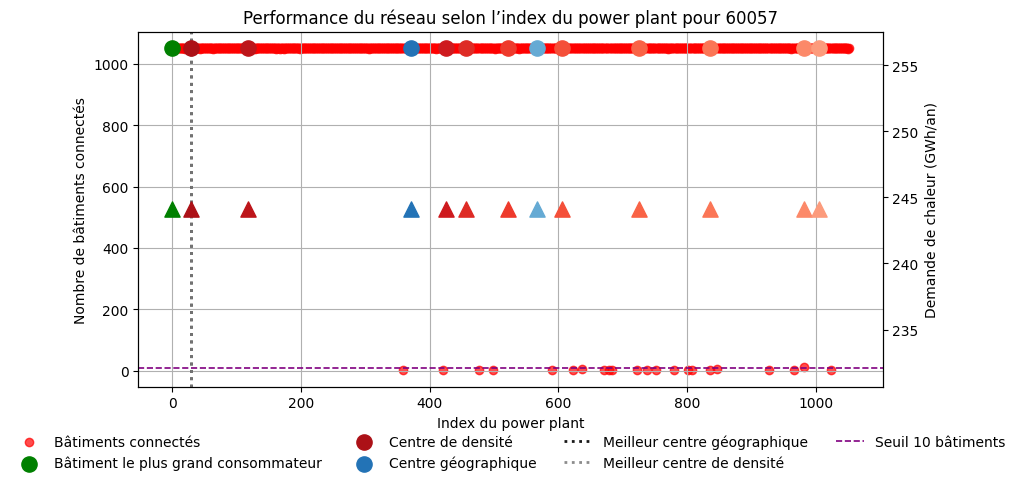

In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

cmap_geom = cm.Blues
cmap_density = cm.Reds

# Dégradé sur la longueur de la liste
n = len(sorted_10_index_centre_density)
colors_density = cmap_density(np.linspace(0.85, 0.35, n))  
colors_geom = cmap_geom(np.linspace(0.85, 0.35, n))

idx_plants = list(dico_results.keys())

nb_connected = [
    dico_results[i]["connected_buildings"]
    for i in idx_plants
]

heat_demand_GWh = [
    dico_results[i]["total_heat_demand_MWh_per_year"] / 1e3
    for i in idx_plants
]

best_geom = sorted_10_index_centre_geom[0]
best_density = sorted_10_index_centre_density[0]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.scatter(
    idx_plants,
    nb_connected,
    marker="o",
    color="red",
    alpha=0.7,
    label="Bâtiments connectés"
)

ax1.set_xlabel("Index du power plant")
ax1.set_ylabel("Nombre de bâtiments connectés")
ax1.grid(True)

for idx, y in zip(idx_plants, nb_connected):
    if idx in sorted_10_index_centre_density:
        ax1.scatter(
            idx, y,
            s=120,
            zorder=6,
            color=colors_density[sorted_10_index_centre_density.index(idx)],
            label="Centre de densité"
            if "Centre de densité" not in ax1.get_legend_handles_labels()[1]
            else ""
        )
    elif idx in sorted_10_index_centre_geom:
        ax1.scatter(
            idx, y,
            s=120,
            zorder=5,
            color=colors_geom[sorted_10_index_centre_geom.index(idx)],
            label="Centre géographique"
            if "Centre géographique" not in ax1.get_legend_handles_labels()[1]
            else ""
        )
    elif idx== 0 :
        ax1.scatter(
            idx, y,
            s=120,
            zorder=4,
            color="green",
            label="Bâtiment le plus grand consommateur"
            if "Bâtiment le plus grand consommateur" not in ax1.get_legend_handles_labels()[1]
            else ""
        )



ax1.axvline(
    x=best_geom,
    linestyle=":",
    linewidth=2,
    alpha=0.9,
    color="black",
    label="Meilleur centre géographique"
)

ax1.axvline(
    x=best_density,
    linestyle=":",
    linewidth=2,
    alpha=0.9,
    color="grey",
    label="Meilleur centre de densité"
)

ax2 = ax1.twinx()

for idx, y in zip(idx_plants, heat_demand_GWh):
    if idx in sorted_10_index_centre_density:
        ax2.scatter(
            idx, y,
            s=120,
            marker='^',
            zorder=3,
            color=colors_density[sorted_10_index_centre_density.index(idx)],
        )
    elif idx in sorted_10_index_centre_geom:
        ax2.scatter(
            idx, y,
            s=120,
            marker='^',
            zorder=2,
            color=colors_geom[sorted_10_index_centre_geom.index(idx)],
        )
    elif idx== 0 :
        ax2.scatter(
            idx, y,
            s=120,
            marker='^',
            zorder=1,
            color="green",
        )

"""ax2.scatter(
    idx_plants,
    heat_demand_GWh,
    color="#4FC3F7",
    marker="s",
    alpha=0.6,
    label="Demande de chaleur"
)"""

ax2.set_ylabel("Demande de chaleur (GWh/an)")

#Barre verticale en y=10
ax1.axhline(
    y=10,
    linestyle="--",
    linewidth=1.2,
    color="purple",
    label="Seuil 10 bâtiments"
)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=4,
    frameon=False
)


plt.title(f"Performance du réseau selon l’index du power plant pour {code_commune_insee}")
plt.tight_layout()
plt.show()


Vérifions que les distances trouvées par Diskstra sont cohérentes : 

In [59]:
#afficher les distances des batiments au plant
print("Distances des bâtiments au powerplant :")

#afficher les batiments avec des couleurs en fonction de leur éloignement

plt.figure(figsize=(12, 12))
ax = plt.gca()
# Routes filtrées (ne changent pas)
lc = LineCollection(filtered_lines, colors='grey', linewidths=0.8)
ax.add_collection(lc)   
# Centroids
scatter = plt.scatter(centroids_x, centroids_y, c=[distances_buildings.get(nb.index, 0) for nb in liste_nodes_buildings], cmap='viridis', s=10, label='Centroids')

#PowerPlant
plt.scatter(centroids_x[idx_ip_plant], centroids_y[idx_ip_plant], color='red', s=20, label='Powerplant')

plt.colorbar(scatter, label='Distance au powerplant (m)')
plt.title(f"Routes et centroids des bâtiments colorés par distance au powerplant - Commune {libelle_commune} ({code_commune_insee})")
plt.legend()
plt.show()

Distances des bâtiments au powerplant :


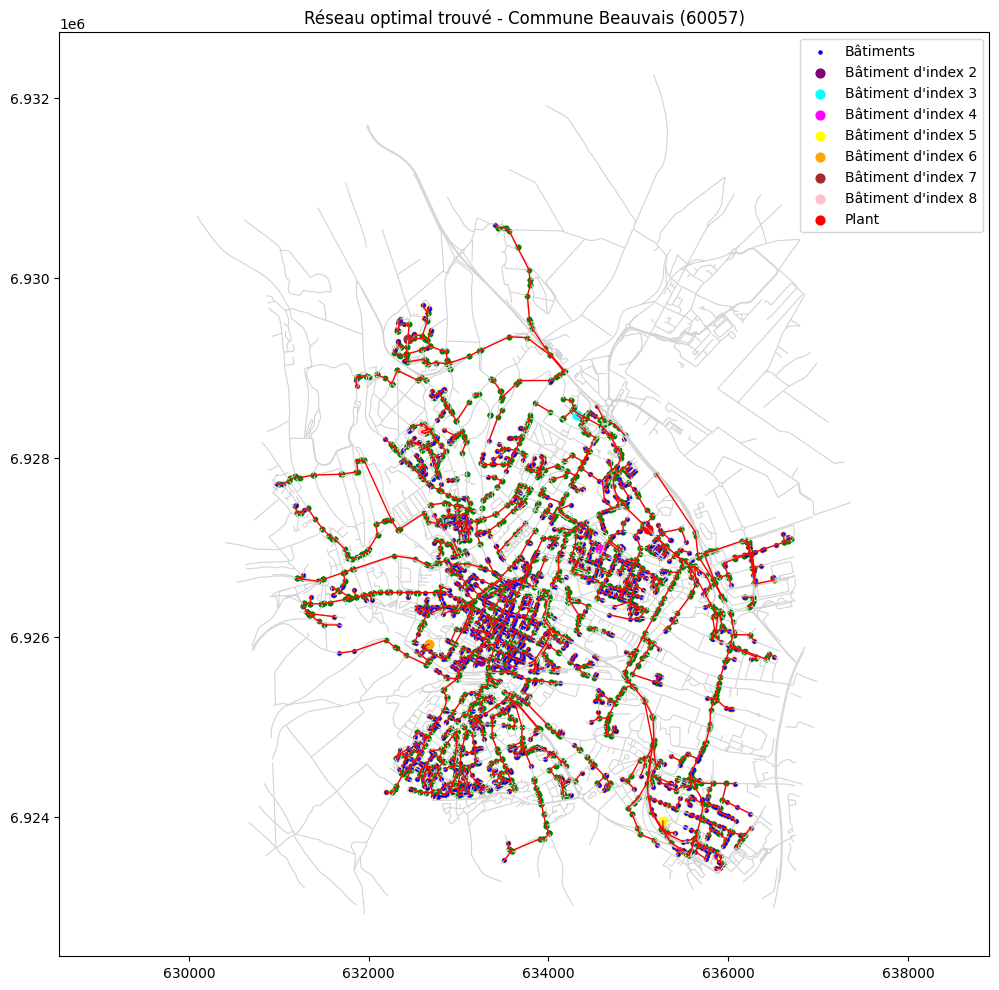

In [60]:
#Tracé le graphe optimal trouvé
plt.figure(figsize=(12, 12))
ax = plt.gca()
# Tracé des routes
lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
ax.add_collection(lc)   
# Tracé des nœuds du réseau utilisé
for ip in network_nodes:
    x, y = ip.center

    if isinstance(ip, NodeRoad):
        plt.scatter(x, y, color='green', s=10)
    elif isinstance(ip, NodeBuilding) and ip.index in connected:
        plt.scatter(x, y, color='orange', s=10)


#relier optimalement les noeuds utilisés entre eux 
for ip in network_nodes:
    for pred_idx in G.predecessors.get(ip.index, []):
        pred_ip = next((n for n in network_nodes if n.index == pred_idx), None)
        if pred_ip is not None:
            x_values = [ip.center[0], pred_ip.center[0]]
            y_values = [ip.center[1], pred_ip.center[1]]
            plt.plot(x_values, y_values, color='red', linewidth=1)


# Tracé des bâtiments
centroids_x = [b.coordinates[0][0] for b in liste_nodes_buildings]
centroids_y = [b.coordinates[0][1] for b in liste_nodes_buildings]
plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Bâtiments')

#afficher le batiment d'index 2 en purple
building_2 = liste_nodes_buildings[2].coordinates[0]
plt.scatter(building_2[0], building_2[1], color='purple', s=40, label='Bâtiment d\'index 2')

#afficher le batiment d'index 3 en cyan
building_3 = liste_nodes_buildings[3].coordinates[0]
plt.scatter(building_3[0], building_3[1], color='cyan', s=40, label='Bâtiment d\'index 3')

#afficher le batiment d'index 4 en magenta
building_4 = liste_nodes_buildings[4].coordinates[0]
plt.scatter(building_4[0], building_4[1], color='magenta', s=40, label='Bâtiment d\'index 4')

#afficher le batiment d'index 5 en yellow
building_5 = liste_nodes_buildings[5].coordinates[0]
plt.scatter(building_5[0], building_5[1], color='yellow', s=40, label='Bâtiment d\'index 5')

#afficher le batiment d'index 6 en orange
building_6 = liste_nodes_buildings[6].coordinates[0]
plt.scatter(building_6[0], building_6[1], color='orange', s=40, label='Bâtiment d\'index 6')

#afficher le batiment d'index 7 en brown
building_7 = liste_nodes_buildings[7].coordinates[0]
plt.scatter(building_7[0], building_7[1], color='brown', s=40, label='Bâtiment d\'index 7')

#afficher le batiment d'index 8 en pink
building_8 = liste_nodes_buildings[8].coordinates[0]
plt.scatter(building_8[0], building_8[1], color='pink', s=40, label='Bâtiment d\'index 8')

#Plant
plant = liste_nodes_buildings[idx_ip_plant].coordinates[0]
plt.scatter(plant[0], plant[1], color='red', s=40, label='Plant')

#Limites strictes sur la zone des bâtiments
all_x = centroids_x
all_y = centroids_y 
if all_x:
    min_x, max_x = min(all_x), max(all_x)
    min_y, max_y = min(all_y), max(all_y)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

plt.legend()
plt.title(f"Réseau optimal trouvé - Commune {libelle_commune} ({code_commune_insee})")
plt.axis("equal")
plt.show()

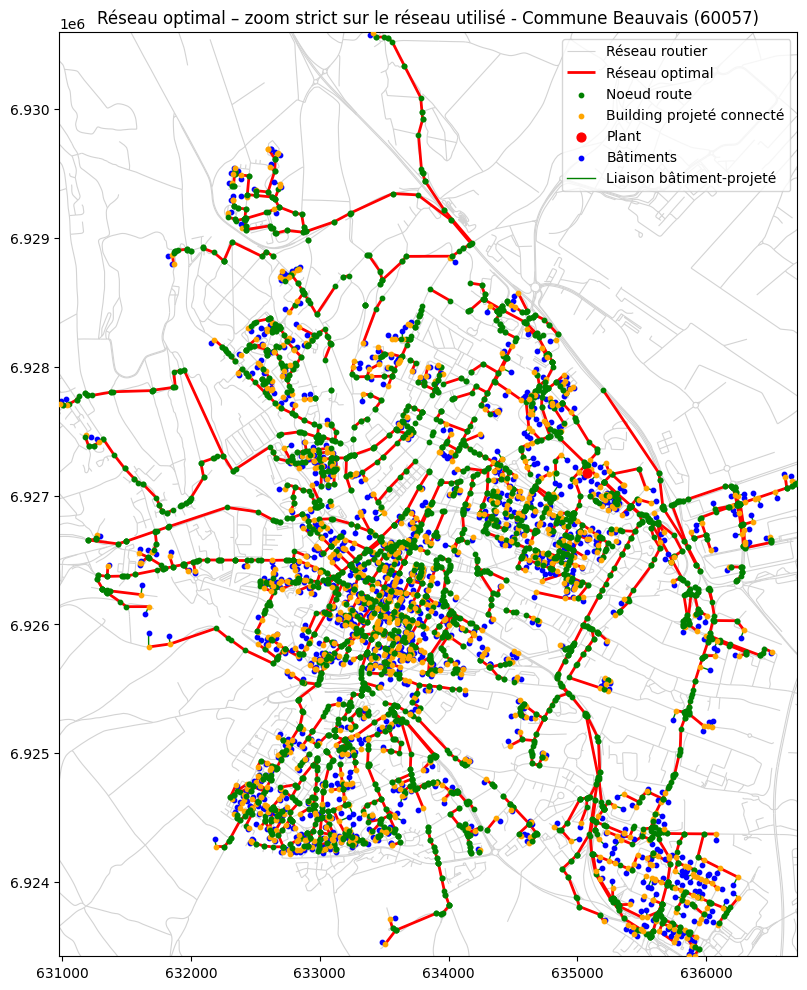

In [61]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

plt.figure(figsize=(12, 12))
ax = plt.gca()

red_segments = []

for ip in network_nodes:
    for pred_idx in G.predecessors.get(ip.index, []):
        pred_ip = next((n for n in network_nodes if n.index == pred_idx), None)
        if pred_ip is not None:
            red_segments.append([
                (ip.center[0], ip.center[1]),
                (pred_ip.center[0], pred_ip.center[1])
            ])


if not red_segments:
    raise ValueError("Aucun segment rouge trouvé")

all_x = [pt[0] for seg in red_segments for pt in seg]
all_y = [pt[1] for seg in red_segments for pt in seg]

margin = 5  # unités CRS
xmin, xmax = min(all_x) - margin, max(all_x) + margin
ymin, ymax = min(all_y) - margin, max(all_y) + margin

#bloquer autoscale
ax.set_autoscale_on(False)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

lc = LineCollection(filtered_lines, colors="lightgrey", linewidths=0.8, label = "Réseau routier")
ax.add_collection(lc)

red_lc = LineCollection(red_segments, colors="red", linewidths=2, label = "Réseau optimal")
ax.add_collection(red_lc)

for ip in network_nodes:
    x, y = ip.center
    if isinstance(ip, NodeRoad):
        ax.scatter(x, y, color="green", s=10, zorder=3, label='Noeud route')
    elif isinstance(ip, NodeBuilding) and ip.index in connected:
        ax.scatter(x, y, color="orange", s=10, zorder=3, label='Building projeté connecté')


plant = liste_nodes_buildings[idx_ip_plant].building_coordinates[0]
ax.scatter(plant[0], plant[1], color="red", s=40, zorder=4, label="Plant")

#tracé des batiments
centroids_x = [b.building_coordinates[0][0] for b in liste_nodes_buildings]
centroids_y = [b.building_coordinates[0][1] for b in liste_nodes_buildings]
ax.scatter(centroids_x, centroids_y, color="blue", s=10, zorder=2, label="Bâtiments")

#tracé des lignes vertes reliant bâtiments au projeté

for ip in network_nodes:
    if isinstance(ip, NodeBuilding):
        building_coord = ip.building_coordinates[0]
        projected_coord = ip.coordinates[0]
        ax.plot(
            [building_coord[0], projected_coord[0]],
            [building_coord[1], projected_coord[1]],
            color="green",
            linewidth=1,
            zorder=1,
            label="Liaison bâtiment-projeté"
        )

#gestion des légendes sans doublons
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())   

ax.set_aspect("equal")
ax.set_title(f"Réseau optimal – zoom strict sur le réseau utilisé - Commune {libelle_commune} ({code_commune_insee})")
plt.show()


On calcule également la longueur totale du réseau et la demande en chaleur couverte. 

In [62]:
edges = set()
total_length = 0.0

for ip in network_nodes:
    for pred_idx in G.predecessors.get(ip.index, []):
        a = min(ip.index, pred_idx)
        b = max(ip.index, pred_idx)
        if (a, b) not in edges:
            edges.add((a, b))
            pred_ip = next((n for n in network_nodes if n.index == pred_idx), None)
            total_length += ip.calcul_distance(pred_ip)

print(f"Longueur totale du réseau (sans double comptage) : {total_length:.2f} m soit {total_length/1000:.2f} km.")


ValueError: L'autre objet doit être une instance de la classe Node.

In [ ]:
#Calcul de la demande totale connectée
total_demand = 0.0
for idx in connected:
    building_node = G.building_ip(idx)
    if building_node is not None:
        total_demand += building_node.heat_demand

print(f"Demande totale connectée : {total_demand/1e3:.2f} GWh/an.")


#Calcul du pourcentage de la demande énergétique couverte
total_possible_demand = sum(nb.heat_demand for nb in liste_nodes_buildings)
if total_possible_demand > 0:
    coverage_percentage = (total_demand / total_possible_demand) * 100
    print(f"Pourcentage de la demande énergétique couverte : {coverage_percentage:.2f} %.")

#Calcul de la densité linéaire couverte par le réseau
lambda_covered = total_demand / total_length  # MWh/m/an
print(f"Densité linéaire couverte par le réseau : {lambda_covered:.2f} MWh/m/an")

Demande totale connectée : 12.84 GWh/an.
Pourcentage de la demande énergétique couverte : 83.07 %.
Densité linéaire couverte par le réseau : 1.55 MWh/m/an


## Comparaison au réseau de chaleur existant

On récupère le tracé des réseaux réels sur le site du cerema : https://www.data.gouv.fr/datasets/traces-des-reseaux-de-chaleur-et-de-froid --> https://www.data.gouv.fr/datasets/traces-des-reseaux-de-chaleur-et-de-froid?resource_id=05e9d484-b6d5-47a7-b985-ac39a86424fd


Et on lui fait subir le même traitement que précédemment (cf preparation_fichiers.ipynb) sur QGis pour récupérer la géométrie, et exporter celle-ci dans une nouvelle colonne "geom_group". On a ouvert la couche vecteur reseaux_de_chaleur.shp.

In [ ]:
from shapely import wkt

reseaux_file="/Users/louisedeferran/Documents/Louise/Mines/effynersys/reseau_chaleur/DHN_Potential_France_EFFINERSYS/data_basis/reseaux_chaleur_reels.csv"

df_reseaux_reels=pd.read_csv(reseaux_file)

df_reseaux_reels_filtered=df_reseaux_reels[df_reseaux_reels["departemen"]==nom_departement]
print(f"Nombre de réseaux réels dans le département {nom_departement} : {len(df_reseaux_reels_filtered)}")

df_reseaux_reels_filtered["geometry"]=df_reseaux_reels_filtered["geom_group"].dropna().apply(wkt.loads)

longueur_totale = sum(geom.length for geom in df_reseaux_reels_filtered["geometry"] if geom is not None)

print(f"Longueur totale des réseaux réels dans le département {nom_departement} : {longueur_totale/1000:.2f} km.")

Nombre de réseaux réels dans le département Gard : 3
Longueur totale des réseaux réels dans le département Gard : 22.54 km.


/var/folders/7q/1g8c6vbj47ndz60jzpr7xn7h0000gn/T/ipykernel_14655/206007361.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reseaux_reels_filtered["geometry"]=df_reseaux_reels_filtered["geom_group"].dropna().apply(wkt.loads)


In [ ]:
from shapely import Point 
# Extraction des segments pour toutes les routes
all_segments_reel = []
for geom_wkt in df_reseaux_reels_filtered["geom_group"]:
    all_segments_reel.extend(extract_lines_xy(geom_wkt))

longueur_totale_segments = sum(
    np.sqrt((seg[1][0] - seg[0][0])**2 + (seg[1][1] - seg[0][1])**2)
    for seg in all_segments_reel
)

print(f"Longueur totale des segments extraits du réseau réel : {longueur_totale_segments/1000:.2f} km.")

# Définir la zone des bâtiments (bounding box) car toutes les routes ne sont pas nécessaires
if centroids_x:
    buffer = 50
    min_x, max_x = min(centroids_x) - buffer, max(centroids_x) + buffer
    min_y, max_y = min(centroids_y) - buffer, max(centroids_y) + buffer
    filtered_lines_reel = [seg for seg in all_segments_reel if filter_segments(seg, min_x, max_x, min_y, max_y)]
else:
    filtered_lines_reel = all_segments_reel








Longueur totale des segments extraits du réseau réel : 2.34 km.


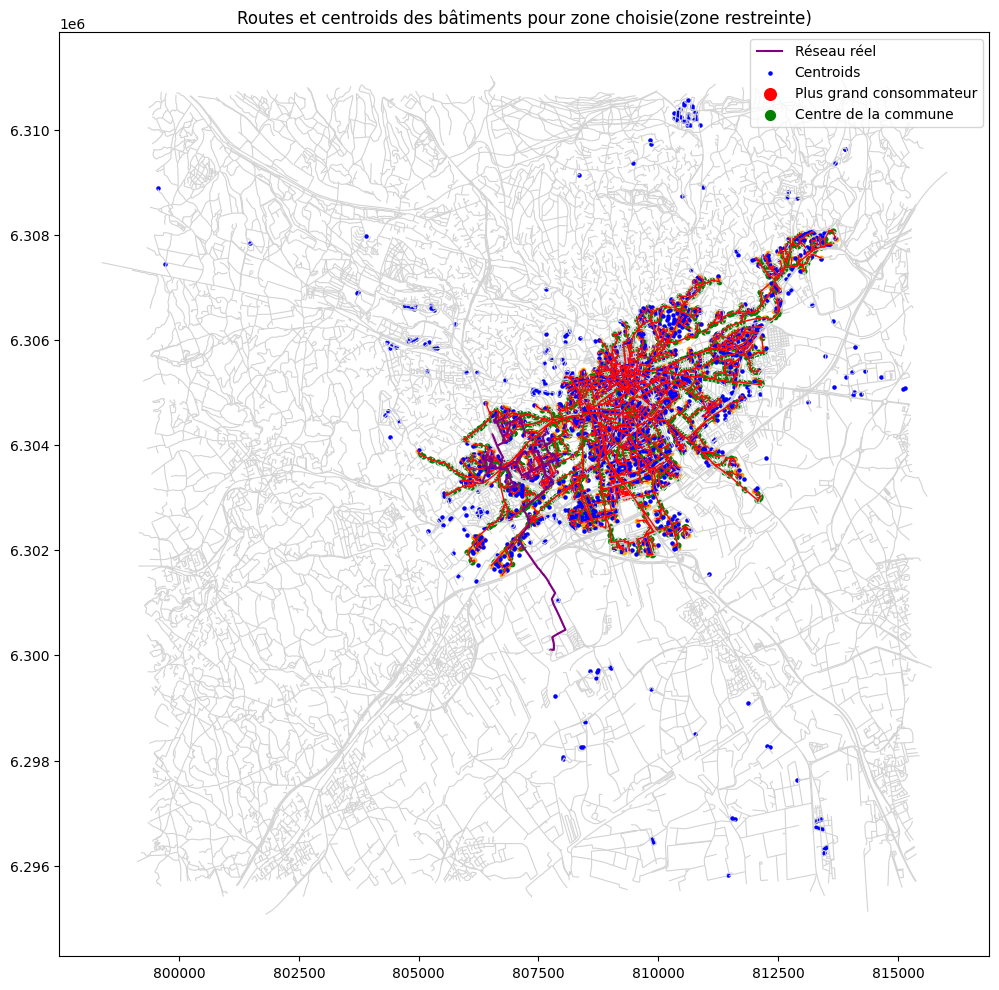

In [ ]:
plt.figure(figsize=(12, 12))
ax = plt.gca()

# Routes filtrées (ne changent pas)
lc = LineCollection(filtered_lines, colors='lightgrey', linewidths=0.8)
ax.add_collection(lc)
ax.autoscale_view()

#Reseau algo
# Tracé des nœuds du réseau utilisé
for ip in network_nodes:
    x, y = ip.center

    if isinstance(ip, NodeRoad):
        plt.scatter(x, y, color='green', s=10)
    elif isinstance(ip, NodeBuilding) and ip.index in connected:
        plt.scatter(x, y, color='orange', s=10)


#relier optimalement les noeuds utilisés entre eux 
for ip in network_nodes:
    for pred_idx in G.predecessors.get(ip.index, []):
        pred_ip = next((n for n in network_nodes if n.index == pred_idx), None)
        if pred_ip is not None:
            x_values = [ip.center[0], pred_ip.center[0]]
            y_values = [ip.center[1], pred_ip.center[1]]
            plt.plot(x_values, y_values, color='red', linewidth=1)

#reseau réel
lc_reel = LineCollection(filtered_lines_reel, colors='purple', linewidths=1.5, label='Réseau réel')
ax.add_collection(lc_reel)
ax.autoscale_view()

# Centroids
if centroids_x : 
    plt.scatter(centroids_x, centroids_y, color='blue', s=5, label='Centroids')
    plt.scatter(centroids_x[0], centroids_y[0], color='red', s=70, label='Plus grand consommateur'  )

#Afficher le centre de la commune et les 10 bâtiments autour
plt.scatter(cx, cy, color='green', s=50, label='Centre de la commune')


    


plt.title("Routes et centroids des bâtiments pour zone choisie(zone restreinte)")

plt.legend()
plt.show()